In [1]:
%load_ext autoreload
%autoreload 2
from utils.utils import *
from utils.utils_train import *
from utils.utils_imports import *

In [2]:
# Load SBERT Embeddings
queries, query_embeddings, product_embeddings = load_raw_queries()

# load ids_toys from disk
with open('output/ids_toys.pkl', 'rb') as file:
    ids_toys = pickle.load(file)
    print(len(ids_toys))
    ids_present = [_id for _id in ids_toys if _id in query_embeddings]

# Assemble qb & xb input embeddings
qb = torch.stack([torch.tensor(query_embeddings[_id]) for _id in ids_present])
xb = torch.tensor(np.array([product_embeddings[_id] for _id in ids_present]))

# Split Dataset into Train and Test
(qb_train, qb_test), (xb_train, xb_test), (idx_train, idx_test) = shuffle_and_split(qb, xb, seed=12)
print('qb_train.shape:', qb_train.shape)
print('qb_test.shape:', qb_test.shape)


loaded (queries, query_embeddings, product_embeddings) from  output/raw_queries.pkl
84373
qb_train.shape: torch.Size([20560, 768])
qb_test.shape: torch.Size([5140, 768])


In [3]:
# Two-Tower Pytorch Model
d = hidden_dim = qb_train.shape[-1]
list_recall3 = []
list_test_epochs = []

# Initialize the network
model = TwoTowerNetwork(d, hidden_dim) 

In [4]:
[print(f"{key:16s}: {val}") for key, val in config.items()]
print()
print(model)


dropout         : 0.1
learning_rate   : 0.0001
label_smoothing : 0.1
batch_size      : 1024
eval_iter       : 1

TwoTowerNetwork(
  (qb_tower): Sequential(
    (0): Linear(in_features=768, out_features=768, bias=True)
    (1): Dropout(p=0.1, inplace=False)
  )
  (xb_tower): Sequential(
    (0): Linear(in_features=768, out_features=768, bias=True)
    (1): Dropout(p=0.1, inplace=False)
  )
)


recall@3  = 0.076                    
recall@3  = 0.186                    
recall@3  = 0.136                    
recall@3  = 0.043                    
recall@3  = 0.041                    
recall@3  = 0.060                    
recall@3  = 0.073                    
recall@3  = 0.084                    
recall@3  = 0.092                    
recall@3  = 0.107                    
recall@3  = 0.119                    
recall@3  = 0.137                    
recall@3  = 0.160                    
recall@3  = 0.169                    
recall@3  = 0.185                    
recall@3  = 0.212                    
recall@3  = 0.230                    
recall@3  = 0.256                    
recall@3  = 0.278                    
recall@3  = 0.296                    
recall@3  = 0.312                    
recall@3  = 0.325                    
recall@3  = 0.337                    
recall@3  = 0.355                    
recall@3  = 0.373                    


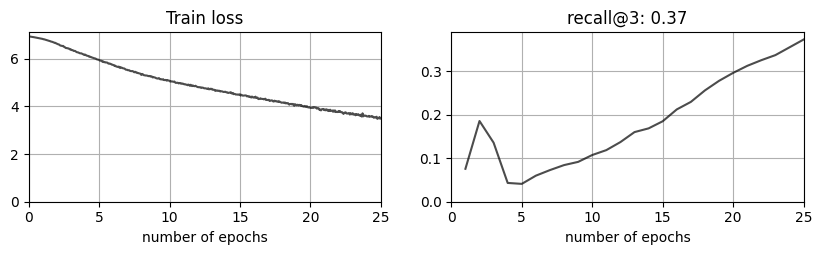

recall@3  = 0.387                    
recall@3  = 0.401                    
recall@3  = 0.417                    
recall@3  = 0.417                    
recall@3  = 0.430                    
recall@3  = 0.442                    
recall@3  = 0.451                    
recall@3  = 0.460                    
recall@3  = 0.470                    
recall@3  = 0.483                    
recall@3  = 0.486                    
recall@3  = 0.497                    
recall@3  = 0.508                    
recall@3  = 0.530                    
recall@3  = 0.531                    
recall@3  = 0.540                    
recall@3  = 0.550                    
recall@3  = 0.559                    
recall@3  = 0.572                    
recall@3  = 0.579                    
recall@3  = 0.588                    
recall@3  = 0.596                    
recall@3  = 0.603                    
recall@3  = 0.608                    
recall@3  = 0.612                    


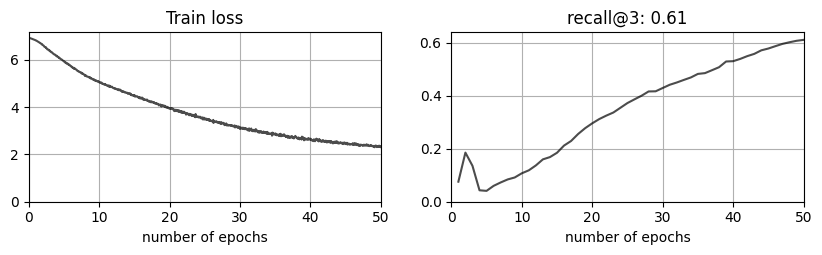

recall@3  = 0.620                    
recall@3  = 0.626                    
recall@3  = 0.633                    
recall@3  = 0.633                    
recall@3  = 0.639                    
recall@3  = 0.641                    
recall@3  = 0.648                    
recall@3  = 0.652                    
recall@3  = 0.655                    
recall@3  = 0.651                    
recall@3  = 0.650                    
recall@3  = 0.656                    
recall@3  = 0.661                    
recall@3  = 0.667                    
recall@3  = 0.669                    
recall@3  = 0.672                    
recall@3  = 0.674                    
recall@3  = 0.685                    
recall@3  = 0.683                    
recall@3  = 0.687                    
recall@3  = 0.693                    
recall@3  = 0.685                    
recall@3  = 0.692                    
recall@3  = 0.703                    
recall@3  = 0.703                    


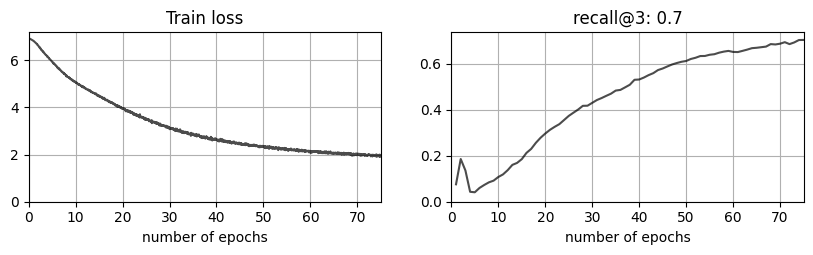

recall@3  = 0.713                    
recall@3  = 0.707                    
recall@3  = 0.703                    
recall@3  = 0.714                    
recall@3  = 0.707                    
recall@3  = 0.711                    
recall@3  = 0.707                    
recall@3  = 0.713                    
recall@3  = 0.712                    
recall@3  = 0.709                    
recall@3  = 0.713                    
recall@3  = 0.711                    
recall@3  = 0.714                    
recall@3  = 0.719                    
recall@3  = 0.715                    
recall@3  = 0.712                    
recall@3  = 0.714                    
recall@3  = 0.724                    
recall@3  = 0.725                    
recall@3  = 0.726                    
recall@3  = 0.726                    
recall@3  = 0.730                    
recall@3  = 0.722                    
recall@3  = 0.724                    
recall@3  = 0.730                    


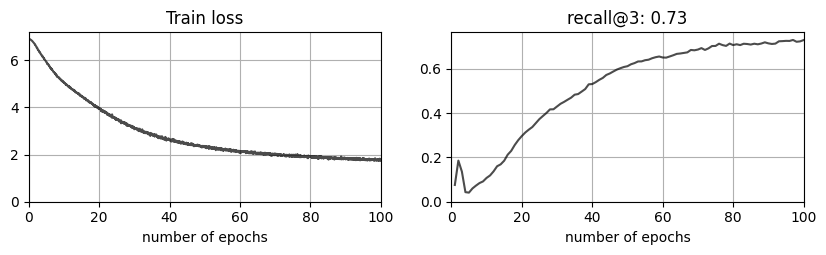

recall@3  = 0.728                    
recall@3  = 0.729                    
recall@3  = 0.728                    
recall@3  = 0.720                    
recall@3  = 0.726                    
recall@3  = 0.738                    
recall@3  = 0.734                    
recall@3  = 0.737                    
recall@3  = 0.734                    
recall@3  = 0.737                    
recall@3  = 0.733                    
recall@3  = 0.744                    
recall@3  = 0.734                    
recall@3  = 0.736                    
recall@3  = 0.739                    
recall@3  = 0.738                    
recall@3  = 0.740                    
recall@3  = 0.741                    
recall@3  = 0.740                    
recall@3  = 0.739                    
recall@3  = 0.737                    
recall@3  = 0.739                    
recall@3  = 0.746                    
recall@3  = 0.750                    
recall@3  = 0.747                    


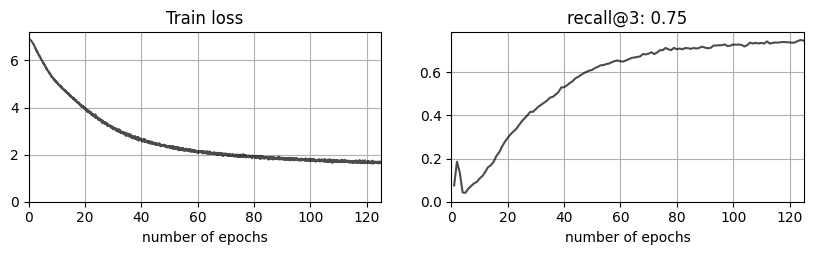

recall@3  = 0.752                    
recall@3  = 0.747                    
recall@3  = 0.746                    
recall@3  = 0.747                    
recall@3  = 0.743                    
recall@3  = 0.744                    
recall@3  = 0.750                    
recall@3  = 0.748                    
recall@3  = 0.748                    
recall@3  = 0.751                    
recall@3  = 0.744                    
recall@3  = 0.749                    
recall@3  = 0.750                    
recall@3  = 0.750                    
recall@3  = 0.748                    
recall@3  = 0.751                    
recall@3  = 0.751                    
recall@3  = 0.753                    
recall@3  = 0.756                    
recall@3  = 0.748                    
recall@3  = 0.746                    
recall@3  = 0.755                    
recall@3  = 0.754                    
recall@3  = 0.754                    
recall@3  = 0.754                    


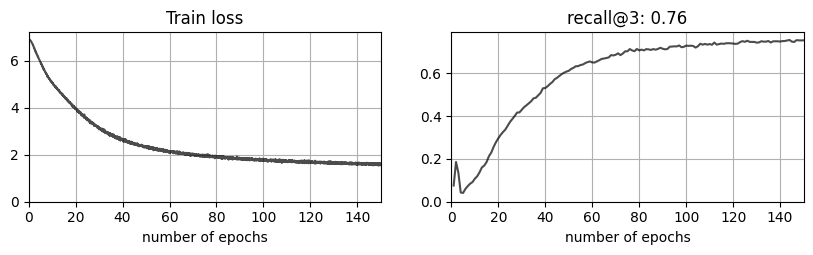

recall@3  = 0.752                    
recall@3  = 0.757                    
recall@3  = 0.758                    
recall@3  = 0.756                    
recall@3  = 0.763                    
recall@3  = 0.754                    
recall@3  = 0.759                    
recall@3  = 0.765                    
recall@3  = 0.750                    
recall@3  = 0.750                    
recall@3  = 0.756                    
recall@3  = 0.748                    
recall@3  = 0.753                    
recall@3  = 0.761                    
recall@3  = 0.755                    
recall@3  = 0.752                    
recall@3  = 0.749                    
recall@3  = 0.742                    
recall@3  = 0.746                    
recall@3  = 0.746                    
recall@3  = 0.744                    
recall@3  = 0.737                    
recall@3  = 0.740                    
recall@3  = 0.734                    
recall@3  = 0.746                    


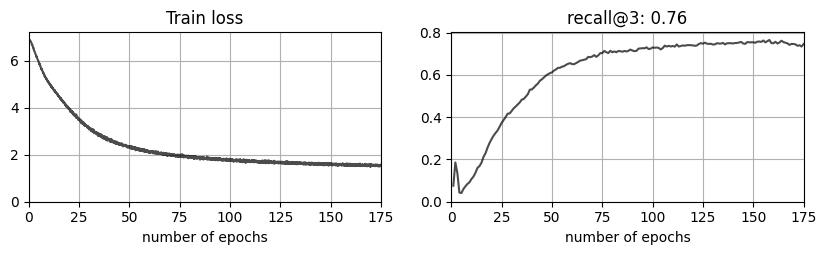

recall@3  = 0.736                    
recall@3  = 0.742                    
recall@3  = 0.734                    
recall@3  = 0.740                    
recall@3  = 0.743                    
recall@3  = 0.735                    
recall@3  = 0.738                    
recall@3  = 0.742                    
recall@3  = 0.736                    
recall@3  = 0.741                    
recall@3  = 0.747                    
recall@3  = 0.742                    
recall@3  = 0.740                    
recall@3  = 0.736                    
recall@3  = 0.730                    
recall@3  = 0.733                    
recall@3  = 0.743                    
recall@3  = 0.730                    
recall@3  = 0.725                    
recall@3  = 0.738                    
recall@3  = 0.728                    
recall@3  = 0.733                    
recall@3  = 0.737                    
recall@3  = 0.742                    
recall@3  = 0.736                    


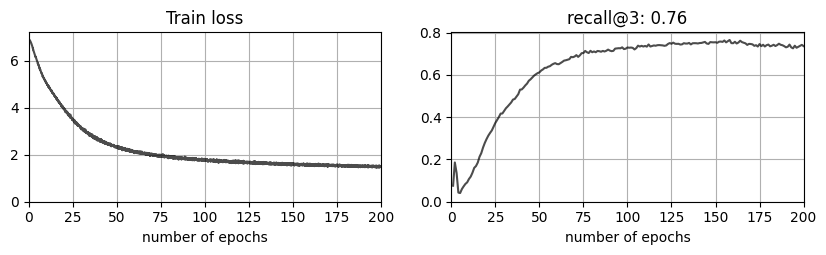

recall@3  = 0.733                    
recall@3  = 0.736                    
recall@3  = 0.733                    
recall@3  = 0.727                    
recall@3  = 0.735                    
recall@3  = 0.733                    
recall@3  = 0.733                    
recall@3  = 0.731                    
recall@3  = 0.737                    
recall@3  = 0.727                    
recall@3  = 0.724                    
recall@3  = 0.727                    
recall@3  = 0.725                    
recall@3  = 0.730                    
recall@3  = 0.738                    
recall@3  = 0.734                    
recall@3  = 0.735                    
recall@3  = 0.733                    
recall@3  = 0.731                    
recall@3  = 0.727                    
recall@3  = 0.735                    
recall@3  = 0.729                    
recall@3  = 0.721                    
recall@3  = 0.731                    
recall@3  = 0.732                    


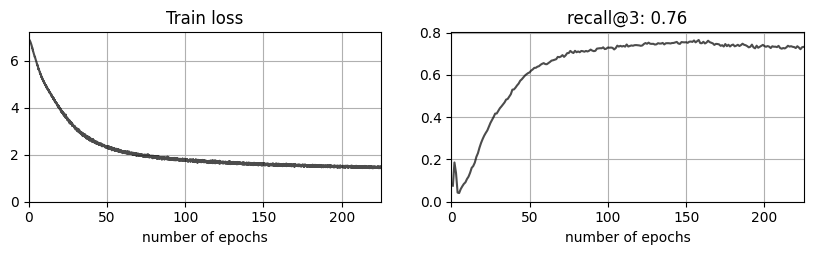

recall@3  = 0.735                    
recall@3  = 0.722                    
recall@3  = 0.732                    
recall@3  = 0.731                    
recall@3  = 0.721                    
recall@3  = 0.721                    
recall@3  = 0.727                    
recall@3  = 0.726                    
recall@3  = 0.729                    
recall@3  = 0.724                    
recall@3  = 0.720                    
recall@3  = 0.721                    
recall@3  = 0.723                    
recall@3  = 0.728                    
recall@3  = 0.723                    
recall@3  = 0.723                    
recall@3  = 0.717                    
recall@3  = 0.722                    
recall@3  = 0.721                    
recall@3  = 0.724                    
recall@3  = 0.733                    
recall@3  = 0.727                    
recall@3  = 0.720                    
recall@3  = 0.739                    
recall@3  = 0.730                    


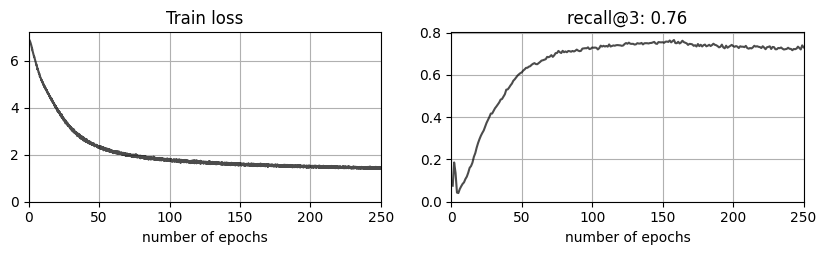

recall@3  = 0.739                    
recall@3  = 0.736                    
recall@3  = 0.728                    
recall@3  = 0.726                    
recall@3  = 0.732                    
recall@3  = 0.736                    
recall@3  = 0.733                    
recall@3  = 0.733                    
recall@3  = 0.732                    
recall@3  = 0.730                    
recall@3  = 0.729                    
recall@3  = 0.727                    
recall@3  = 0.732                    
recall@3  = 0.727                    
recall@3  = 0.731                    
recall@3  = 0.732                    
recall@3  = 0.732                    
recall@3  = 0.727                    
recall@3  = 0.731                    
recall@3  = 0.729                    
recall@3  = 0.733                    
recall@3  = 0.732                    
recall@3  = 0.732                    
recall@3  = 0.726                    
recall@3  = 0.732                    


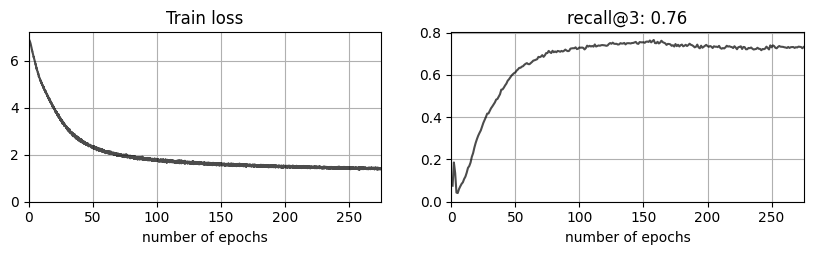

recall@3  = 0.723                    
recall@3  = 0.725                    
recall@3  = 0.727                    
recall@3  = 0.730                    
recall@3  = 0.727                    
recall@3  = 0.733                    
recall@3  = 0.728                    
recall@3  = 0.728                    
recall@3  = 0.734                    
recall@3  = 0.728                    
recall@3  = 0.733                    
recall@3  = 0.731                    
recall@3  = 0.733                    
recall@3  = 0.729                    
recall@3  = 0.728                    
recall@3  = 0.729                    
recall@3  = 0.731                    
recall@3  = 0.726                    
recall@3  = 0.725                    
recall@3  = 0.726                    
recall@3  = 0.727                    
recall@3  = 0.728                    
recall@3  = 0.721                    
recall@3  = 0.724                    
recall@3  = 0.728                    


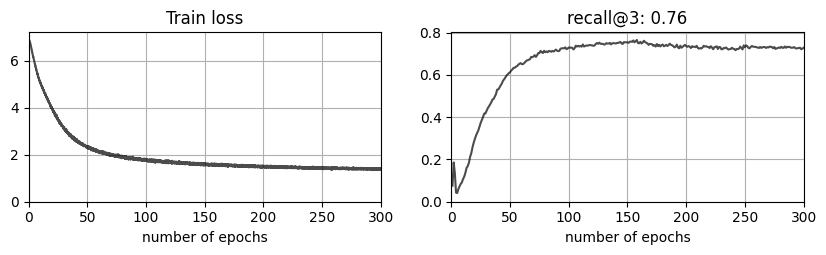

In [5]:
## TRAIN
# Hyperparameters
num_epochs = 1

for i in range(300):
    (qb_train, _), (xb_train, _), (_) = shuffle_and_split(qb_train, xb_train, split=1)

    # train for 1 epoch
    model.fit(qb_train, xb_train, num_epochs)

    # write output embeddings for eval
    write_output_embeddings(model, qb_test, xb_test) 

    # run eval
    os.system('cd utils && python3 utils_infer.py')

    # read recall@3 metric written to json file
    with open('output/recall3.json', 'r') as file:
        recall3 = json.load(file)['recall3']

    # monitor metrics for 
    list_test_epochs.append(model.epochs[-1])
    list_recall3.append(recall3) 

    if (i+1) % 25 == 0:
        model.plot(qb_train, list_test_epochs, list_recall3) 

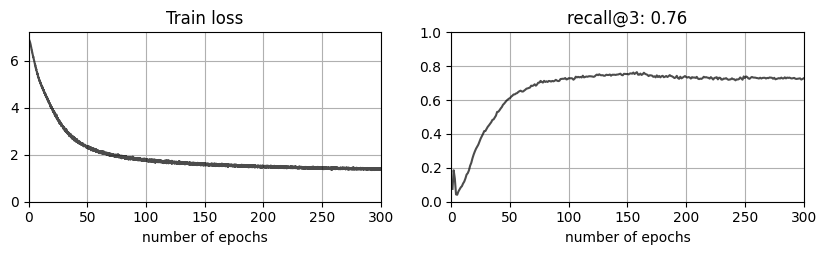

In [7]:
model.plot(qb_train, list_test_epochs, list_recall3)


In [7]:
model

TwoTowerNetwork(
  (qb_tower): Sequential(
    (0): Linear(in_features=768, out_features=768, bias=True)
    (1): Dropout(p=0.1, inplace=False)
  )
  (xb_tower): Sequential(
    (0): Linear(in_features=768, out_features=768, bias=True)
    (1): Dropout(p=0.1, inplace=False)
  )
)

In [ ]:
# TODO:
# 1. figure out how to incorporate a learning_rate scheduler
# 2. print the top 3 results for hits. 

### The End

In [ ]:
# Load queries, ids_toys, ids_present
with open('output/raw_queries.pkl', 'rb') as file:
    queries, _, _ = pickle.load(file)

with open('output/ids_toys.pkl', 'rb') as file:
    ids_toys = pickle.load(file)
    ids_present = [_id for _id in ids_toys if _id in query_embeddings]


In [5]:
top_ids = [ids_present[idx_test[i]] for i in I[0]]
names = [info[_id]['name'] for _id in top_ids]
details = [info[_id]['details'] for _id in top_ids]
description = [info[_id]['description'] for _id in top_ids]
queries[ids_present[idx_test[0]]]

"I need to buy a Super-duper Tutu/Cape/Mask set in size 4-6 for my 4-6-year-old. It's a 3-piece set perfect for little Superheroines and Rock Stars!"